# OpenValidators platform analytics

In [10]:
import pandas as pd


versions = ['1.0.0', '1.0.1', '1.0.2', '1.0.4', '1.0.5', '1.0.6']

metadata_dfs = []

for version in versions:    
    metadata_dfs.append(pd.read_csv(f'hf://datasets/opentensor/openvalidators/{version}/metadata.csv'))

all_metadata = pd.concat(metadata_dfs, ignore_index=True)
all_metadata .head()

,Unnamed: 0.1,Unnamed: 0,run_id,completed,downloaded,last_checkpoint,hotkey,openvalidators_version,problematic,problematic_reason,...,wandb_run_name,wandb_user_info,wandb_tags,wandb_createdAt,wandb_heartbeatAt,wandb_state,Unnamed: 0.2,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3
0,0.0,0.0,4xhhhffw,False,False,2023-06-15 11:36:02,5GsFAR9jaf381pR2kLAy3AyPD2FqryZxoxknA4QkUxBJNU5v,1.0.0,True,run_df columns do not match the expected schem...,...,northern-dragon-1039,rickaraujo1987,"['1.0.0', '5GsFAR9jaf381pR2kLAy3AyPD2FqryZxoxk...",2023-06-13T14:43:47,2023-06-13T14:46:32,failed,NaN,NaN,NaN,NaN
1,1.0,1.0,zsue5glf,True,True,2023-06-15 11:36:05,5GsFAR9jaf381pR2kLAy3AyPD2FqryZxoxknA4QkUxBJNU5v,1.0.0,False,NaN,...,still-terrain-1022,rickaraujo1987,"['1.0.0', '5GsFAR9jaf381pR2kLAy3AyPD2FqryZxoxk...",2023-06-13T14:31:52,2023-06-13T14:38:35,failed,NaN,NaN,NaN,NaN
2,2.0,2.0,f6n9g4o2,True,True,2023-06-15 11:36:08,5GsFAR9jaf381pR2kLAy3AyPD2FqryZxoxknA4QkUxBJNU5v,1.0.0,False,NaN,...,restful-paper-1020,rickaraujo1987,"['1.0.0', '5GsFAR9jaf381pR2kLAy3AyPD2FqryZxoxk...",2023-06-13T14:10:44,2023-06-13T14:31:50,finished,NaN,NaN,NaN,NaN
3,3.0,3.0,ei3o8rof,True,True,2023-06-15 11:36:12,5GsFAR9jaf381pR2kLAy3AyPD2FqryZxoxknA4QkUxBJNU5v,1.0.0,False,NaN,...,fancy-gorge-1019,rickaraujo1987,"['1.0.0', '5GsFAR9jaf381pR2kLAy3AyPD2FqryZxoxk...",2023-06-13T13:53:51,2023-06-13T14:10:42,finished,NaN,NaN,NaN,NaN
4,4.0,4.0,5xd6eg09,True,True,2023-06-15 11:36:16,5GsFAR9jaf381pR2kLAy3AyPD2FqryZxoxknA4QkUxBJNU5v,1.0.0,False,NaN,...,stilted-sponge-1016,rickaraujo1987,"['1.0.0', '5GsFAR9jaf381pR2kLAy3AyPD2FqryZxoxk...",2023-06-13T13:37:55,2023-06-13T13:53:49,finished,NaN,NaN,NaN,NaN


## Current overview of validators data extraction by version

<BarContainer object of 6 artists>
<BarContainer object of 6 artists>
<BarContainer object of 6 artists>


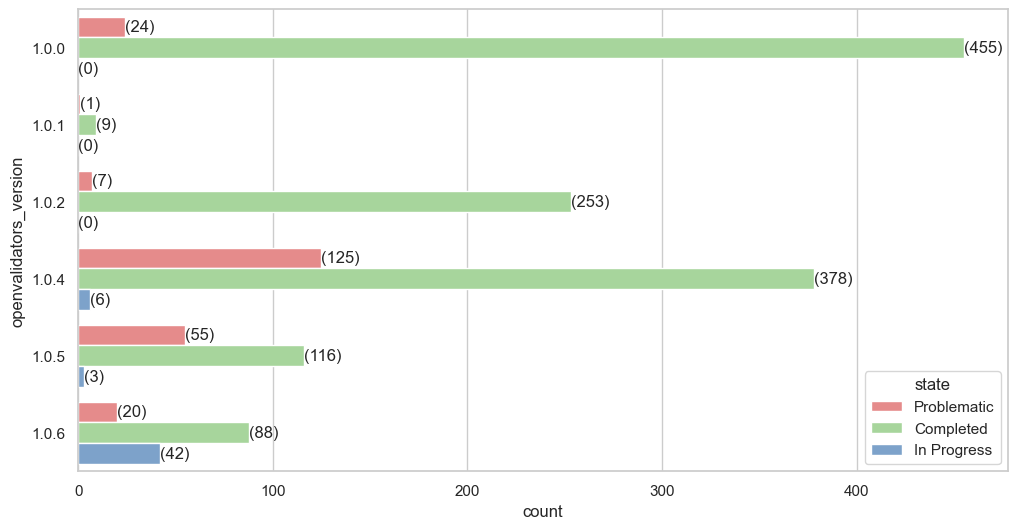

In [63]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_run_states(df):
    # Define the state colors
    state_labels = ['Problematic', 'In Progress', 'Completed']

    # Map the state colors to the 'problematic' and 'downloaded' columns
    df['state'] = df.apply(lambda row: state_labels[0] if row['problematic'] else (state_labels[1] if not row['downloaded'] else state_labels[2]), axis=1)

    # Count the number of runs for each openvalidators version and state
    counts = df.groupby(['openvalidators_version', 'state']).size().unstack(fill_value=0)

    # Reset the index to make 'openvalidators_version' a column
    counts = counts.reset_index()

    # Melt the DataFrame to create a stacked representation
    counts = counts.melt(id_vars='openvalidators_version', var_name='state', value_name='runs')

    # Set the plotting style
    sns.set(style='whitegrid')

    # Plot the horizontal bar plot with seaborn
    plt.figure(figsize=(12, 6))
    #red, green, blue
    ax = sns.countplot(data=df, y='openvalidators_version', hue='state', palette=['#F47C7C', '#A1DE93', '#70A1D7'])

    for container in ax.containers:
        print(container)
        ax.bar_label(container, fmt='(%.0f)', label_type='edge')


    # Display the plot
    plt.show()

plot_run_states(all_metadata)

## Progression of version usage through time

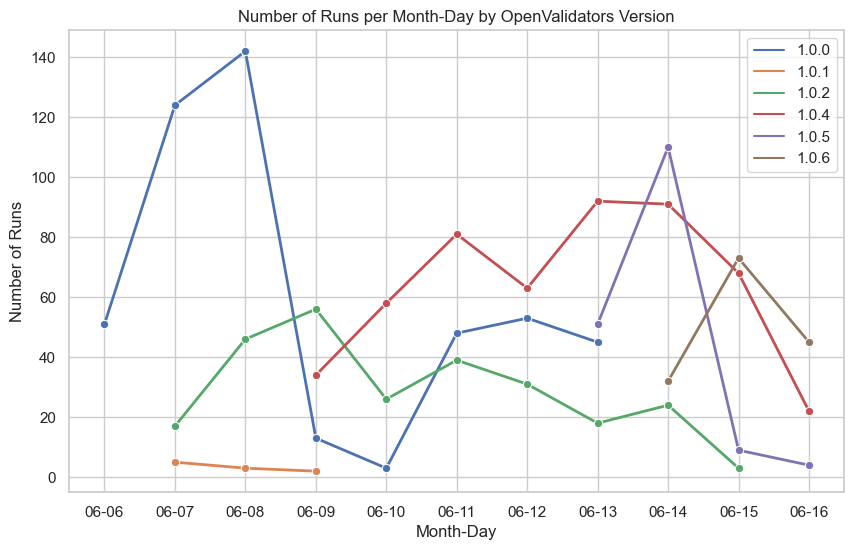

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_runs_per_day(df):
    # Convert 'wandb_createdAt' column to datetime
    df['wandb_createdAt'] = pd.to_datetime(df['wandb_createdAt'])

    # Extract month and day from 'wandb_createdAt' column
    df['month_day'] = df['wandb_createdAt'].dt.strftime('%m-%d')

    # Group by 'month_day' and 'openvalidators_version' and count the number of runs
    grouped = df.groupby(['month_day', 'openvalidators_version']).size().reset_index(name='count')

    # Define the color palette as a gradient
    num_versions = len(grouped['openvalidators_version'].unique())    

    # Plot the line plot with gradient colors
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.lineplot(data=grouped, x='month_day', y='count', hue='openvalidators_version', marker='o', linewidth=2)

    # Set the plot labels and title
    plt.xlabel('Month-Day')
    plt.ylabel('Number of Runs')
    plt.title('Number of Runs per Month-Day by OpenValidators Version')

    # Show the legend
    plt.legend()

    # Display the plot
    plt.show()

# Assuming you have a DataFrame named 'df'
plot_runs_per_day(all_metadata)


## Average run time of validator by version

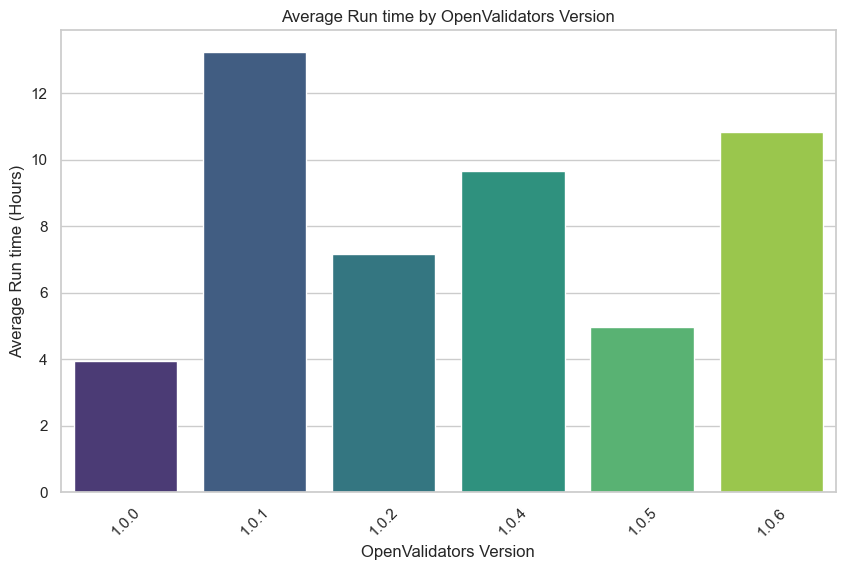

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


def plot_average_run_hours(df):
    # Convert 'wandb_createdAt' and 'wandb_heartbeatAt' columns to datetime
    df['wandb_createdAt'] = pd.to_datetime(df['wandb_createdAt'])
    df['wandb_heartbeatAt'] = pd.to_datetime(df['wandb_heartbeatAt'])

    # Calculate the time difference in hours between 'wandb_createdAt' and 'wandb_heartbeatAt'
    df['run_hours'] = (df['wandb_heartbeatAt'] - df['wandb_createdAt']).dt.total_seconds() / 3600

    # Calculate the average update delay in hours for each 'openvalidators_version'
    average_delay = df.groupby('openvalidators_version')['run_hours'].mean()

    # Plot the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=average_delay.index, y=average_delay.values, palette='viridis')

    # Set the plot labels and title
    plt.xlabel('OpenValidators Version')
    plt.ylabel('Average Run time (Hours)')
    plt.title('Average Run time by OpenValidators Version')

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()

# Assuming you have a DataFrame named 'df'
plot_average_run_hours(all_metadata)

## Top 15 users with the most runs

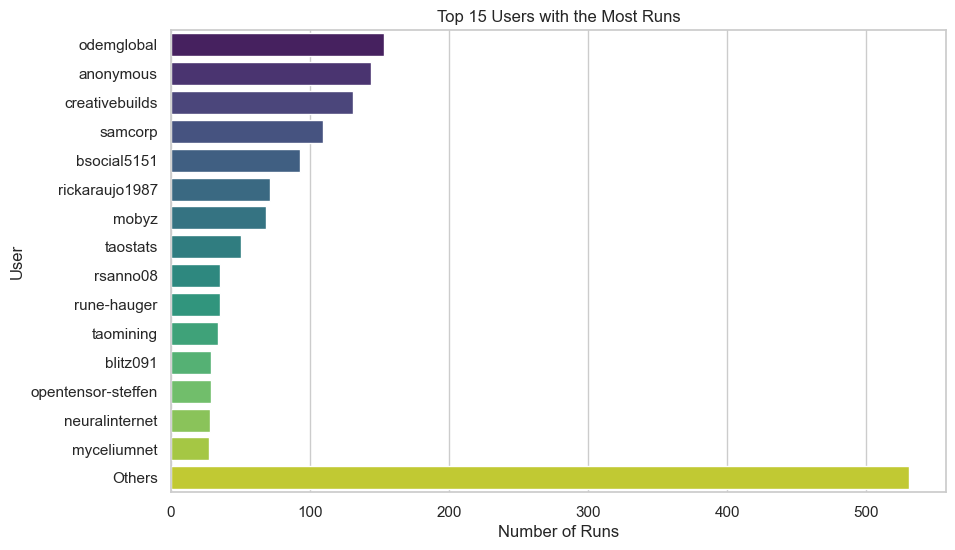

In [14]:
def plot_top_users(df, top_n=15):
    # Group by 'wandb_user_info' and count the number of runs
    df['wandb_user_info_custom'] = df['wandb_user_info'].apply(lambda x: 'anonymous' if str(x).startswith('anony') else x)
    user_counts = df['wandb_user_info_custom'].value_counts()

    # Get the top 10 users
    top_users = user_counts.head(top_n)

    # Aggregate the rest into a single 'Others' category
    other_count = user_counts[top_n:].sum()
    top_users['Others'] = other_count

    # Create a DataFrame from the top users
    top_users_df = pd.DataFrame(top_users).reset_index()
    top_users_df.columns = ['wandb_user_info_custom', 'runs']

    # Set the plotting style
    sns.set(style='whitegrid')

    # Plot the horizontal bar plot with seaborn
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=top_users_df, x='runs', y='wandb_user_info_custom', palette='viridis')

    # Set the plot labels and title
    plt.xlabel('Number of Runs')
    plt.ylabel('User')
    plt.title(f'Top {top_n} Users with the Most Runs')

    # Display the plot
    plt.show()

plot_top_users(all_metadata)

## Distribution of rows by wandb_user_info

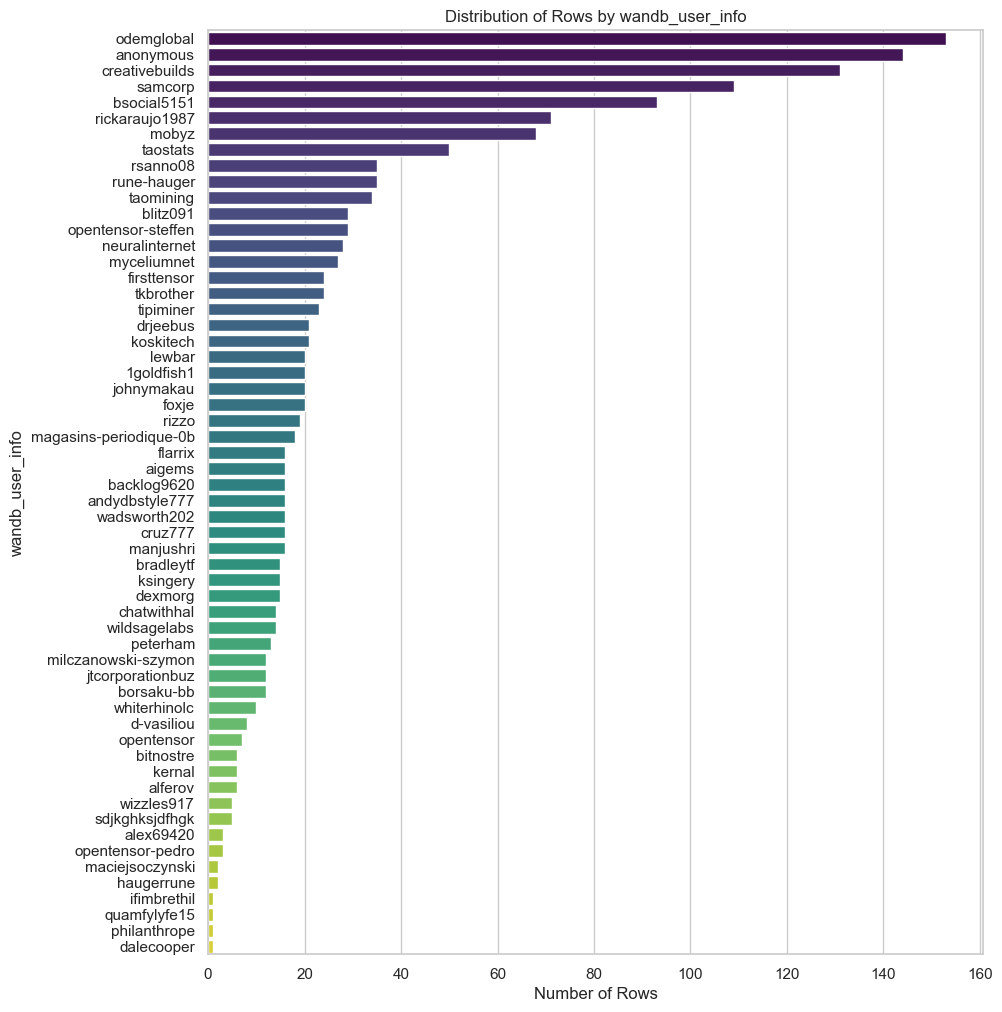

In [15]:
def plot_user_distribution(df):
    user_counts = df['wandb_user_info_custom'].value_counts()
    
    plt.figure(figsize=(10, 12))
    ax = sns.barplot(x=user_counts.values, y=user_counts.index, palette='viridis')
    ax.set_title('Distribution of Rows by wandb_user_info')
    ax.set_xlabel('Number of Rows')
    ax.set_ylabel('wandb_user_info')
    plt.show()

plot_user_distribution(all_metadata)

# Unique rows contribution through time

Total of unique rows in OpenAI dataset:  573,751


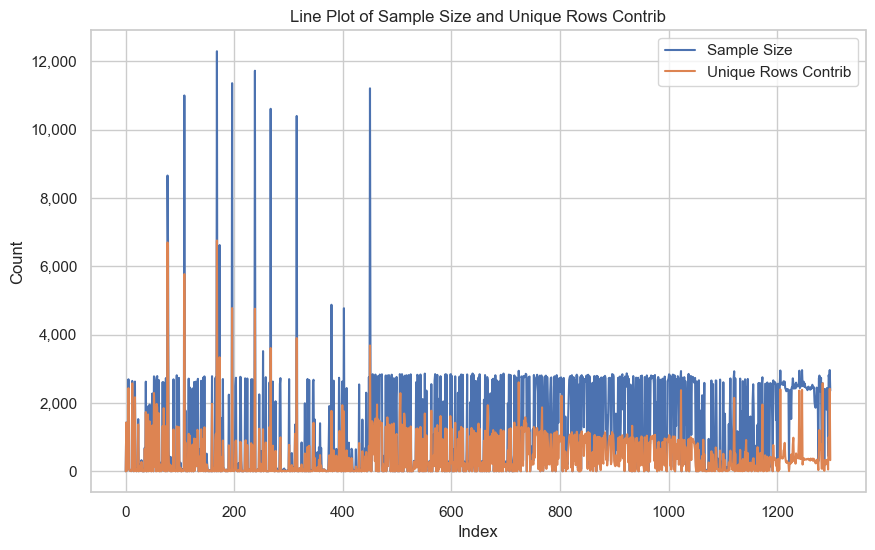

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

path = 'hf://datasets/opentensor/openvalidators-mining/openai/scanned_runs.csv'
opeai_df = pd.read_csv(path)
print('Total of unique rows in OpenAI dataset: ',f"{opeai_df['unique_rows_contrib'].sum():,d}")

def plot_lineplot(df):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x=df.index, y='sample_size', label='Sample Size')
    sns.lineplot(data=df, x=df.index, y='unique_rows_contrib', label='Unique Rows Contrib')
    plt.title('Line Plot of Sample Size and Unique Rows Contrib')
    plt.xlabel('Index')
    plt.ylabel('Count')
    plt.legend()

    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.show()
    
plot_lineplot(opeai_df)

# Show top 40 users in terms of new unique contribution rows

/var/folders/l2/6rhmcwp93973j7_t_5vztd1r0000gn/T/ipykernel_30279/432022990.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_users = top_users.append({'wandb_user_info': 'Others', 'unique_rows_contrib': other_users_sum}, ignore_index=True)


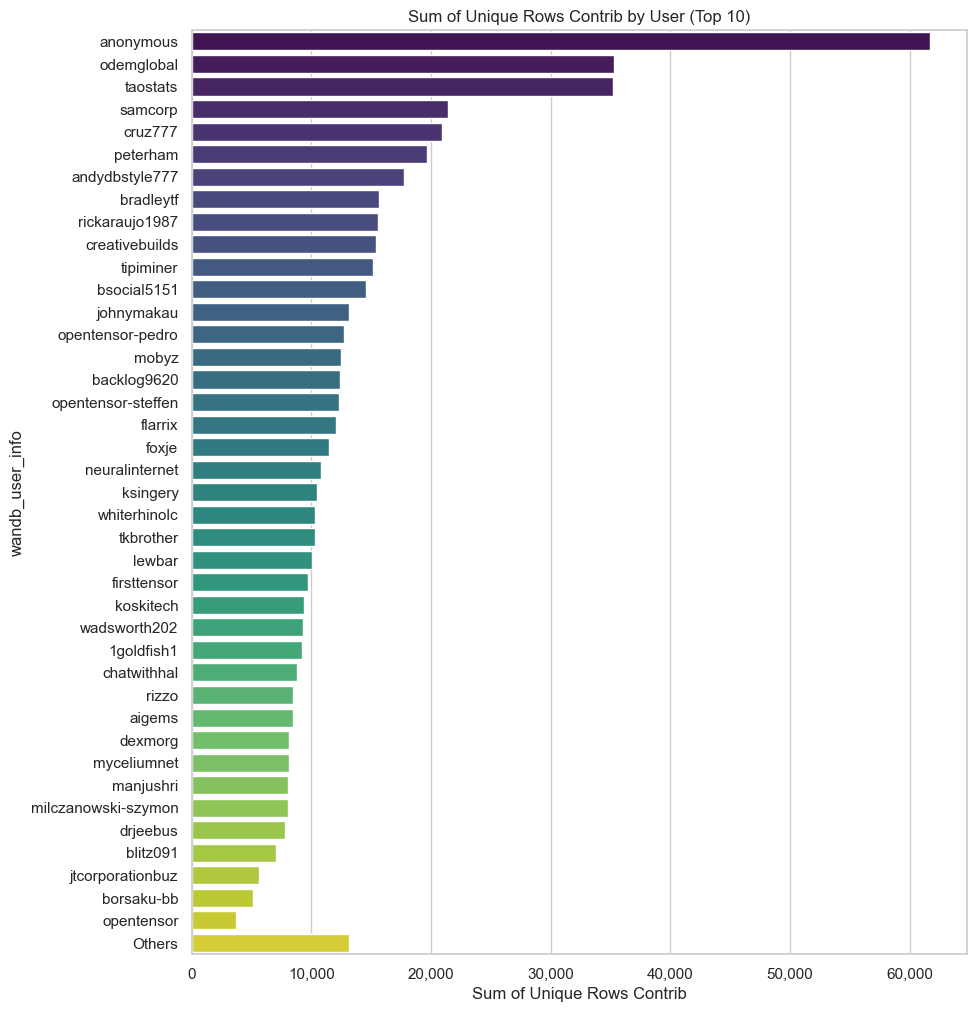

In [72]:
import matplotlib.ticker as mticker

def plot_unique_rows_contrib(openai_df, all_metadata, top_n=40):
    # Join the two datasets by run_id
    merged_df = openai_df.merge(all_metadata, on='run_id')
    
    # Replace usernames starting with "anony" with "anonymous"
    merged_df['wandb_user_info'] = merged_df['wandb_user_info'].apply(lambda x: 'anonymous' if str(x).lower().startswith('anony') else x)
    
    # Calculate the sum of unique_rows_contrib for each user
    user_contrib_sum = merged_df.groupby('wandb_user_info')['unique_rows_contrib'].sum().reset_index()
    
    # Get the top 10 users by contribution
    top_users = user_contrib_sum.nlargest(top_n, 'unique_rows_contrib')
    
    # Sum contributions of other users and add to 'Others'
    other_users_sum = user_contrib_sum.loc[~user_contrib_sum['wandb_user_info'].isin(top_users['wandb_user_info'])]['unique_rows_contrib'].sum()
    top_users = top_users.append({'wandb_user_info': 'Others', 'unique_rows_contrib': other_users_sum}, ignore_index=True)
    
    plt.figure(figsize=(10, 12))
    ax = sns.barplot(x='unique_rows_contrib', y='wandb_user_info', data=top_users, palette='viridis')
    ax.set_title('Sum of Unique Rows Contrib by User (Top 10)')
    ax.set_xlabel('Sum of Unique Rows Contrib')
    ax.set_ylabel('wandb_user_info')
    ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
    plt.show()

plot_unique_rows_contrib(opeai_df, all_metadata)    